# Unicode Distribution Creation
The purpose of this project is to demonstrate how a set of unicode characters can be turned into a probability distribution for sampling from. The goal is to create a ipython magic function so this can be done easily. For example the following code would create a close to normal distribution object:
```
%%create_dist
   _____
  /     \
 /       \
/         \
```

In [203]:
# The general approach we are taking is as follows:
# 1. Render the unicode characters as an image using PILLOW
# 2. Consider the image to be a histogram and determine bin counts with missing data
# 3. Interpolate data with pandas so the data is continuous
# 4. Change this into a distribution that can be sampled from
# 5. Stretch goal: Implement smoothing using rolling window
#
# See https://asc-paint.glitch.me/ as a way to create fancy ANSI curves

from IPython.core.magic import register_cell_magic

@register_cell_magic
def create_dist(line, cell):
    import pandas as pd
    import numpy as np
    from PIL import Image, ImageDraw, ImageFont
    
    # TODO: figure out how big the canvas should be from the size of the text entered
    img=Image.new("L", (500,250), color=255)
    
    # TODO: consider making the font choice an option, and choose size based on canvas descision
    scp_font=ImageFont.truetype("./SourceCodePro-Medium.ttf",size=48)
    
    # Create drawing object and render our text
    dr=ImageDraw.Draw(img)
    dr=dr.text((0,0), cell, font=scp_font)
    
    WHITE_PIXEL_VALUE=255
    
    # calculate the values along the x axis of the number of white pixels under the curve or set
    # the value to None if there is no curve present at a given location
    pixels=[]
    for x in range(img.size[0]):
        num_white_pixels=0
        for y in range(img.size[1]):
            if img.getpixel((x,img.size[1]-1-y)) != WHITE_PIXEL_VALUE:
                break
            num_white_pixels+=1
        if num_white_pixels==img.size[1]:
            pixels.append(None)
        else:
            pixels.append(num_white_pixels)
    
    # convert list to pandas to clean up distribution
    pixels=pd.Series(pixels)
    # trim the start and end of the pixel series from nans
    pixels=pixels[~pixels.isna()]
    # add back in gaps as nans by resampling to a secon frequency
    pixels.index=pd.to_datetime(pixels.index,unit='s')
    pixels=pixels.resample('1s').asfreq()
    
    # interpolate to make distribution continuous
    pixels=pixels.interpolate(limit_direction="both")
    #print(f"After we interpolated data, our series object is now of len {len(pixels)}")
    
    # smooth data with rolling window
    # TODO: Need to determine the size of the window based on size of the image/data
    pixels=pixels.rolling(25,min_periods=25).mean()
    
    # TODO: we still have NAs at the beginning of our pixels, WTF?
    # TODO: the date time index isn't needed any more so we should drop that back to integers?
    # TODO: we need to generate the probability of a given point being chosen and put that in df["prob"]
    # TODO: we need to generate the cummulative probability of a given point and put that in df["cum_prob"]
    # TODO: then we pull out np.random.uniform() and find the closest point in df["cum_prob"] to that
    # what's a good way to do this? lame way: np.min(np.abs(df["cum_prob"]-rando_num)) ??? 
    # Then we want to pull out that number's index. hrm.
    
    #pixels.plot()
    df=pd.DataFrame(pixels,columns=["datapoints"])
    df["prob"]=df["datapoints"]/len(df)
    display(df)
    return
    #return(pixels)

In [204]:
%%create_dist
   _____
  /     \
 /       \
/         \


,datapoints,prob
1970-01-01 00:00:04,NaN,NaN
1970-01-01 00:00:05,NaN,NaN
1970-01-01 00:00:06,NaN,NaN
1970-01-01 00:00:07,NaN,NaN
1970-01-01 00:00:08,NaN,NaN
1970-01-01 00:00:09,NaN,NaN
1970-01-01 00:00:10,NaN,NaN
1970-01-01 00:00:11,NaN,NaN
1970-01-01 00:00:12,NaN,NaN
1970-01-01 00:00:13,NaN,NaN


1970-01-01 00:00:04          NaN
1970-01-01 00:00:05          NaN
1970-01-01 00:00:06          NaN
1970-01-01 00:00:07          NaN
1970-01-01 00:00:08          NaN
                         ...    
1970-01-01 00:05:10    65.720000
1970-01-01 00:05:11    63.693333
1970-01-01 00:05:12    61.720000
1970-01-01 00:05:13    59.800000
1970-01-01 00:05:14    57.933333
Freq: S, Length: 311, dtype: float64

After we rolled the data, our series object is now of len 398


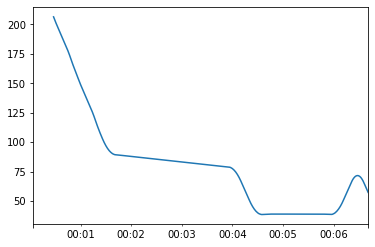

In [189]:
%%create_dist
\    
 \
  \
        \___/\

In [152]:
pixels[150]

143.0

In [140]:
import pandas as pd
df=pd.DataFrame({"name":["chris","bob"], "age":[23,24]})

# these are essentially the same
#print(df.__repr__())
#print(df)
# these are the same **
#print(df.__str__())
#print(str(df))

#display(df)
#df;

def pepperoni():
    print(df)
    df["newname"]=None
    #df=pd.DataFrame({"name":["chipper","in son"], "age":[3,99]})
    #print(globals()["df"])
    
pepperoni()

    name  age
0  chris   23
1    bob   24


In [141]:
df

,name,age,newname
0,chris,23,None
1,bob,24,None
